<a href="https://colab.research.google.com/github/nabuulek/Flight-Delay-Prediction/blob/main/FlightDelayPrediection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Define the path to your datasets
train_path = '/content/drive/MyDrive/Refactory Capstone Project/Train.csv'
test_path = '/content/drive/MyDrive/Refactory Capstone Project/Test.csv'

# Read the datasets
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [5]:
train.shape,test.shape

((107833, 10), (9333, 9))

In [6]:
IDs=test['ID']
IDs

0          test_id_0
1          test_id_1
2          test_id_2
3          test_id_3
4          test_id_4
            ...     
9328    test_id_9328
9329    test_id_9329
9330    test_id_9330
9331    test_id_9331
9332    test_id_9332
Name: ID, Length: 9333, dtype: object

In [7]:
target=train['target']
target

0         260.0
1          20.0
2           0.0
3           0.0
4          22.0
          ...  
107828      0.0
107829      0.0
107830      0.0
107831      0.0
107832      0.0
Name: target, Length: 107833, dtype: float64

In [8]:
# Define the updated function
def describe_dataframe(df):
    """
    Returns a DataFrame with columns, their datatypes, value counts, and total number of unique values.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with column information.
    """
    # Initialize lists to store column information
    columns = []
    data_types = []
    value_counts = []
    unique_values = []

    # Iterate over each column in the DataFrame
    for col in df.columns:
        columns.append(col)
        data_types.append(df[col].dtype)
        value_counts.append(df[col].value_counts().to_dict())
        unique_values.append(df[col].nunique())

    # Create a new DataFrame with the collected information
    summary_df = pd.DataFrame({
        'Column': columns,
        'DataType': data_types,
        'ValueCounts': value_counts,
        'UniqueValues': unique_values
    })

    return summary_df

# Get the summary DataFrame for the train dataset
train_summary = describe_dataframe(train)
train_summary

,Column,DataType,ValueCounts,UniqueValues
0,ID,object,"{'train_id_0': 1, 'train_id_71872': 1, 'train_...",107833
1,DATOP,object,"{'2018-08-31': 183, '2016-08-25': 179, '2018-0...",1011
2,FLTID,object,"{'WKL 0000 ': 3105, 'TU 0613 ': 1284, 'TU 0397...",1861
3,DEPSTN,object,"{'TUN': 42522, 'DJE': 10252, 'ORY': 6755, 'MIR...",132
4,ARRSTN,object,"{'TUN': 42572, 'DJE': 10198, 'ORY': 6755, 'MIR...",128
5,STD,object,"{'2017-06-23 06:00:00': 8, '2017-08-18 06:00:0...",81697
6,STA,object,"{'2016-01-19 01.00.00': 6, '2018-04-07 01.00.0...",85136
7,STATUS,object,"{'ATA': 93679, 'SCH': 13242, 'DEP': 467, 'RTR'...",5
8,AC,object,"{'TU 320IMU': 4724, 'TU 320IMW': 4685, 'TU 320...",68
9,target,float64,"{0.0: 38168, 10.0: 3038, 15.0: 2680, 5.0: 2406...",968


In [9]:
# Get the summary DataFrame for the test dataset
test_summary = describe_dataframe(test)
test_summary

,Column,DataType,ValueCounts,UniqueValues
0,ID,object,"{'test_id_0': 1, 'test_id_6199': 1, 'test_id_6...",9333
1,DATOP,object,"{'2018-09-03': 181, '2018-09-02': 181, '2018-0...",86
2,FLTID,object,"{'WKL 0000 ': 267, 'AOG 0000 ': 106, 'TU 0635 ...",700
3,DEPSTN,object,"{'TUN': 3621, 'DJE': 926, 'ORY': 574, 'MIR': 5...",82
4,ARRSTN,object,"{'TUN': 3650, 'DJE': 898, 'ORY': 574, 'MIR': 5...",84
5,STD,object,"{'2017-02-21 08:00:00': 7, '2016-05-02 22:00:0...",7012
6,STA,object,"{'2016-05-03 01.00.00': 6, '2016-05-29 09.20.0...",7290
7,STATUS,object,"{'ATA': 8027, 'SCH': 1228, 'DEP': 37, 'RTR': 2...",5
8,AC,object,"{'TU 320IMS': 423, 'TU 320IMV': 400, 'TU 320IM...",44


In [10]:
def find_missing_values(df):
    # Calculate missing values for each column
    missing_values = df.isnull().sum()

    # Create a DataFrame to store the results
    missing_values_df = pd.DataFrame({
        'Column': missing_values.index,
        'MissingValues': missing_values.values
    })

    # Filter columns with missing values
    missing_values_df = missing_values_df[missing_values_df['MissingValues'] > 0]

    return missing_values_df
# Find missing values in the train dataset
train_missing_values = find_missing_values(train)
print("Missing Values in Train Dataset:")
train_missing_values

Missing Values in Train Dataset:


,Column,MissingValues


In [11]:
# Find missing values in the test dataset
test_missing_values = find_missing_values(test)
print("\nMissing Values in Test Dataset:")
test_missing_values


Missing Values in Test Dataset:


,Column,MissingValues


In [12]:
import pandas as pd

def drop_columns(df, columns_to_drop):
    # Drop specified columns
    df = df.drop(columns=columns_to_drop, errors='ignore')

    return df


In [13]:
# Define the list of columns to drop
columns_to_drop = ['ID','FLTID','DEPSTN','ARRSTN','AC']  # Replace with the actual column names

# Drop columns from the train dataset
train = drop_columns(train, columns_to_drop)
print("Train DataFrame after dropping columns:")
train.head()

Train DataFrame after dropping columns:


,DATOP,STD,STA,STATUS,target
0,2016-01-03,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,260.0
1,2016-01-13,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,20.0
2,2016-01-16,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,0.0
3,2016-01-17,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,0.0
4,2016-01-17,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,22.0


In [14]:
# Drop columns from the test dataset
test = drop_columns(test, columns_to_drop)
print("\nTest DataFrame after dropping columns:")
test.head()


Test DataFrame after dropping columns:


,DATOP,STD,STA,STATUS
0,2016-05-04,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA
1,2016-05-05,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA
2,2016-05-06,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA
3,2016-05-11,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA
4,2016-05-11,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA


In [15]:
import pandas as pd

# Define the function to perform one-hot encoding
def one_hot_encode_column(df, column_name):
    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=[column_name])

    return df_encoded

column_to_encode = 'STATUS'

# Perform one-hot encoding on the train dataset
train = one_hot_encode_column(train, column_to_encode)
print("Train DataFrame after one-hot encoding:")
train.head()

Train DataFrame after one-hot encoding:


,DATOP,STD,STA,target,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH
0,2016-01-03,2016-01-03 10:30:00,2016-01-03 12.55.00,260.0,True,False,False,False,False
1,2016-01-13,2016-01-13 15:05:00,2016-01-13 16.55.00,20.0,True,False,False,False,False
2,2016-01-16,2016-01-16 04:10:00,2016-01-16 06.45.00,0.0,True,False,False,False,False
3,2016-01-17,2016-01-17 14:10:00,2016-01-17 17.00.00,0.0,True,False,False,False,False
4,2016-01-17,2016-01-17 14:30:00,2016-01-17 15.50.00,22.0,True,False,False,False,False


In [16]:
# Perform one-hot encoding on the test dataset
test = one_hot_encode_column(test, column_to_encode)
print("\nTest DataFrame after one-hot encoding:")
test.head()


Test DataFrame after one-hot encoding:


,DATOP,STD,STA,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH
0,2016-05-04,2016-05-04 06:40:00,2016-05-04 07.30.00,True,False,False,False,False
1,2016-05-05,2016-05-05 15:20:00,2016-05-05 20.05.00,True,False,False,False,False
2,2016-05-06,2016-05-06 10:00:00,2016-05-06 12.25.00,True,False,False,False,False
3,2016-05-11,2016-05-11 09:40:00,2016-05-11 13.10.00,True,False,False,False,False
4,2016-05-11,2016-05-11 09:50:00,2016-05-11 12.35.00,True,False,False,False,False


In [17]:
import pandas as pd

# Define the function to extract date features
def extract_date_features(df, date_column):
    # Convert the date column to datetime format if needed
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    # Extract year, month, and day
    df['Year'] = df[date_column].dt.year
    df['Month'] = df[date_column].dt.month
    df['Day'] = df[date_column].dt.day

    return df


# Define the date column
date_column = 'DATOP'

# Extract date features from the train dataset
train = extract_date_features(train, date_column)
print("Train DataFrame with date features extracted:")
train.head()

Train DataFrame with date features extracted:


,DATOP,STD,STA,target,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day
0,2016-01-03,2016-01-03 10:30:00,2016-01-03 12.55.00,260.0,True,False,False,False,False,2016,1,3
1,2016-01-13,2016-01-13 15:05:00,2016-01-13 16.55.00,20.0,True,False,False,False,False,2016,1,13
2,2016-01-16,2016-01-16 04:10:00,2016-01-16 06.45.00,0.0,True,False,False,False,False,2016,1,16
3,2016-01-17,2016-01-17 14:10:00,2016-01-17 17.00.00,0.0,True,False,False,False,False,2016,1,17
4,2016-01-17,2016-01-17 14:30:00,2016-01-17 15.50.00,22.0,True,False,False,False,False,2016,1,17


In [18]:
# Extract date features from the test dataset
test = extract_date_features(test, date_column)
print("\nTest DataFrame with date features extracted:")
test.head()


Test DataFrame with date features extracted:


,DATOP,STD,STA,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day
0,2016-05-04,2016-05-04 06:40:00,2016-05-04 07.30.00,True,False,False,False,False,2016,5,4
1,2016-05-05,2016-05-05 15:20:00,2016-05-05 20.05.00,True,False,False,False,False,2016,5,5
2,2016-05-06,2016-05-06 10:00:00,2016-05-06 12.25.00,True,False,False,False,False,2016,5,6
3,2016-05-11,2016-05-11 09:40:00,2016-05-11 13.10.00,True,False,False,False,False,2016,5,11
4,2016-05-11,2016-05-11 09:50:00,2016-05-11 12.35.00,True,False,False,False,False,2016,5,11


In [19]:
import pandas as pd

def extract_datetime_components(df, datetime_column, extension):
    # Convert the datetime column to datetime format with specified format
    df[datetime_column] = pd.to_datetime(df[datetime_column], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    # Extract year, month, day, hour, minute, and second
    df[f'Year_{extension}'] = df[datetime_column].dt.year
    df[f'Month_{extension}'] = df[datetime_column].dt.month
    df[f'Day_{extension}'] = df[datetime_column].dt.day
    df[f'Hour_{extension}'] = df[datetime_column].dt.hour
    df[f'Minute_{extension}'] = df[datetime_column].dt.minute
    df[f'Second_{extension}'] = df[datetime_column].dt.second

    return df


# Example usage:
# Assuming 'df' is your DataFrame and 'STA' and 'STD' are the scheduled arrival and departure columns
# Call the function to extract datetime components
# train = extract_datetime_components(train, datetime_column='STA', extension='STA')
train = extract_datetime_components(train, datetime_column='STD', extension='STD')
train.head()

,DATOP,STD,STA,target,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day,Year_STD,Month_STD,Day_STD,Hour_STD,Minute_STD,Second_STD
0,2016-01-03,2016-01-03 10:30:00,2016-01-03 12.55.00,260.0,True,False,False,False,False,2016,1,3,2016,1,3,10,30,0
1,2016-01-13,2016-01-13 15:05:00,2016-01-13 16.55.00,20.0,True,False,False,False,False,2016,1,13,2016,1,13,15,5,0
2,2016-01-16,2016-01-16 04:10:00,2016-01-16 06.45.00,0.0,True,False,False,False,False,2016,1,16,2016,1,16,4,10,0
3,2016-01-17,2016-01-17 14:10:00,2016-01-17 17.00.00,0.0,True,False,False,False,False,2016,1,17,2016,1,17,14,10,0
4,2016-01-17,2016-01-17 14:30:00,2016-01-17 15.50.00,22.0,True,False,False,False,False,2016,1,17,2016,1,17,14,30,0


In [20]:
# test = extract_datetime_components(test, datetime_column='STA', extension='STA')
test = extract_datetime_components(test, datetime_column='STD', extension='STD')
test.head()

,DATOP,STD,STA,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day,Year_STD,Month_STD,Day_STD,Hour_STD,Minute_STD,Second_STD
0,2016-05-04,2016-05-04 06:40:00,2016-05-04 07.30.00,True,False,False,False,False,2016,5,4,2016,5,4,6,40,0
1,2016-05-05,2016-05-05 15:20:00,2016-05-05 20.05.00,True,False,False,False,False,2016,5,5,2016,5,5,15,20,0
2,2016-05-06,2016-05-06 10:00:00,2016-05-06 12.25.00,True,False,False,False,False,2016,5,6,2016,5,6,10,0,0
3,2016-05-11,2016-05-11 09:40:00,2016-05-11 13.10.00,True,False,False,False,False,2016,5,11,2016,5,11,9,40,0
4,2016-05-11,2016-05-11 09:50:00,2016-05-11 12.35.00,True,False,False,False,False,2016,5,11,2016,5,11,9,50,0


In [21]:
import pandas as pd

def extract_time_from_datetime_columns(df, datetime_column):
    # Convert the datetime column to string
    df[datetime_column] = df[datetime_column].astype(str)

    # Extract hours, minutes, and seconds using string methods and properties
    df[f'Hour_{datetime_column}'] = df[datetime_column].str.split().str[1].str.split('.').str[0].str.split(':').str[0]
    df[f'Minute_{datetime_column}'] = df[datetime_column].str.split().str[1].str.split('.').str[0].str.split(':').str[1]
    df[f'Second_{datetime_column}'] = df[datetime_column].str.split().str[1].str.split('.').str[0].str.split(':').str[2]

    # Convert extracted components to integers, handling NaN values
    df[f'Hour_{datetime_column}'] = pd.to_numeric(df[f'Hour_{datetime_column}'], errors='coerce')
    df[f'Minute_{datetime_column}'] = pd.to_numeric(df[f'Minute_{datetime_column}'], errors='coerce')
    df[f'Second_{datetime_column}'] = pd.to_numeric(df[f'Second_{datetime_column}'], errors='coerce')

    return df

# Example usage:
# Assuming 'train' is your DataFrame and 'STA' and 'STD' are the scheduled arrival and departure columns
# Call the function to extract hours, minutes, and seconds from the datetime columns
train = extract_time_from_datetime_columns(train, datetime_column='STA')

# Print the DataFrame with hours, minutes, and seconds extracted from STA column
print("DataFrame with time components extracted from STA column:")
train.head()

DataFrame with time components extracted from STA column:


,DATOP,STD,STA,target,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,...,Day,Year_STD,Month_STD,Day_STD,Hour_STD,Minute_STD,Second_STD,Hour_STA,Minute_STA,Second_STA
0,2016-01-03,2016-01-03 10:30:00,2016-01-03 12.55.00,260.0,True,False,False,False,False,2016,...,3,2016,1,3,10,30,0,12,NaN,NaN
1,2016-01-13,2016-01-13 15:05:00,2016-01-13 16.55.00,20.0,True,False,False,False,False,2016,...,13,2016,1,13,15,5,0,16,NaN,NaN
2,2016-01-16,2016-01-16 04:10:00,2016-01-16 06.45.00,0.0,True,False,False,False,False,2016,...,16,2016,1,16,4,10,0,6,NaN,NaN
3,2016-01-17,2016-01-17 14:10:00,2016-01-17 17.00.00,0.0,True,False,False,False,False,2016,...,17,2016,1,17,14,10,0,17,NaN,NaN
4,2016-01-17,2016-01-17 14:30:00,2016-01-17 15.50.00,22.0,True,False,False,False,False,2016,...,17,2016,1,17,14,30,0,15,NaN,NaN


In [22]:
test = extract_time_from_datetime_columns(test, datetime_column='STA')

In [23]:
# Drop columns from the test dataset
columns_to_drop=["DATOP","STD","STA","Year_STD","Month_STD","Day_STD","Minute_STD","Second_STD","Minute_STA","Second_STA"]
test = drop_columns(test, columns_to_drop)
train=drop_columns(train, columns_to_drop)

In [24]:
train.head()

,target,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day,Hour_STD,Hour_STA
0,260.0,True,False,False,False,False,2016,1,3,10,12
1,20.0,True,False,False,False,False,2016,1,13,15,16
2,0.0,True,False,False,False,False,2016,1,16,4,6
3,0.0,True,False,False,False,False,2016,1,17,14,17
4,22.0,True,False,False,False,False,2016,1,17,14,15


In [25]:
import pandas as pd

def calculate_flight_hours(df, departure_hour_column, arrival_hour_column, flight_hours_column):
    # Calculate flight hours (assuming arrival hour is greater than departure hour)
    df[flight_hours_column] = df[arrival_hour_column] - df[departure_hour_column]

    return df

In [26]:
# Apply the function to the train dataset
train = calculate_flight_hours(train, departure_hour_column='Hour_STD', arrival_hour_column='Hour_STA', flight_hours_column='Flight_Hours')

# Apply the function to the test dataset
test = calculate_flight_hours(test, departure_hour_column='Hour_STD', arrival_hour_column='Hour_STA', flight_hours_column='Flight_Hours')
train.head()

,target,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day,Hour_STD,Hour_STA,Flight_Hours
0,260.0,True,False,False,False,False,2016,1,3,10,12,2
1,20.0,True,False,False,False,False,2016,1,13,15,16,1
2,0.0,True,False,False,False,False,2016,1,16,4,6,2
3,0.0,True,False,False,False,False,2016,1,17,14,17,3
4,22.0,True,False,False,False,False,2016,1,17,14,15,1


In [27]:
test.head()

,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Year,Month,Day,Hour_STD,Hour_STA,Flight_Hours
0,True,False,False,False,False,2016,5,4,6,7,1
1,True,False,False,False,False,2016,5,5,15,20,5
2,True,False,False,False,False,2016,5,6,10,12,2
3,True,False,False,False,False,2016,5,11,9,13,4
4,True,False,False,False,False,2016,5,11,9,12,3


In [28]:
X = train.drop('target', axis=1)
y = target

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Step 1: Model Selection
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

# Step 2: Model Training and Evaluation
for name, model in models.items():
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training
    model.fit(X_train, y_train)

    # Model evaluation using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()
    print(f"{name} - Mean RMSE: {mean_rmse}")


Linear Regression - Mean RMSE: 114.5663012340178
Decision Tree - Mean RMSE: 150.16197041807408
Random Forest - Mean RMSE: 124.77540120151407
Gradient Boosting - Mean RMSE: 112.21857078349834
XGBoost - Mean RMSE: 111.82258494094533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 86266, number of used features: 11
[LightGBM] [Info] Start training from score 48.806216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 69012, number of used features: 11
[LightGBM] 

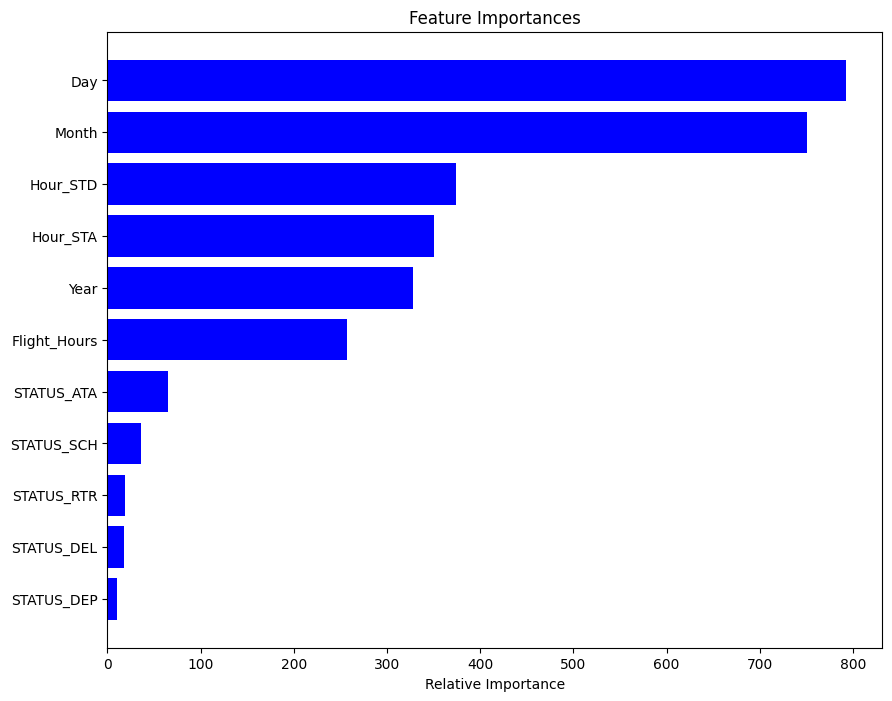

In [40]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
#sine LightGBM had the least RMSE we choose that to make preddictions
test_predictions = models['LightGBM'].predict(test)


In [31]:
predictions_df = pd.DataFrame({'test_id': IDs, 'target_predicted': test_predictions})

In [32]:
# # Download the CSV file
predictions_df.to_csv('test_predictions.csv', index=False)